## Clasificación desde Machine Learning
### Camila Vera Villa - miercoles 31 de julio

Descripción
En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:
* default : Variable binaria. Registra si el cliente entró en morosidad o no.
* income : Ingreso promedio declarado por el cliente.
* balance : Total de saldo en la cuenta de crédito (deuda).
* student : Variable binaria. Registra si el cliente es estudiante o no

### Desafío 1: Preparación del ambiente de trabajo

* Importe los módulos básicos para el análisis de datos
* Importe seaborn .
* Importe statsmodels
* Importe LogisticRegression , train_test_split , StandardScaler , classification_report y roc_curve de sklearn


In [2]:
# librerias clasicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#statmodels para generar modelos de regresio
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

#sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# graficos
plt.style.use('seaborn') 
plt.rcParams["figure.figsize"] = (5, 2) # Tamaño 
plt.rcParams["figure.dpi"] = 100 # resolución

In [33]:
#carga del data set y limpieza index
df=pd.read_csv('default_credit.csv').drop("index", axis=1) 

df.head(10)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
5,No,Yes,919.588530,7491.558572
6,No,No,825.513331,24905.226578
7,No,Yes,808.667504,17600.451344
8,No,No,1161.057854,37468.529288
9,No,No,0.000000,29275.268293


In [4]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [5]:
len(df)

10000

### Desafío 2: Análisis exploratorio
* Explore las principales relaciones entre las variables. Utilizando los métodos boxplot y lmplot de seaborn implemente los siguientes gráficos:

    * Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.
    * Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.
    * Un boxplot del balance total de las cuentas, segmentado por el status de default.
    * Un boxplot del ingreso total de cada cliente, segmentado por el status de default.
    * Un diagrama de dispersión entre balance e income , segmentado por el status de estudiante.
    * Un diagrama de dispersión entre balance e income , segmentado por el status de default.
* Comente brevemente sobre los principales patrones de comportamiento.
* tip: Puede utilizar el argumento hue en lmplot para identificar las observaciones por status.

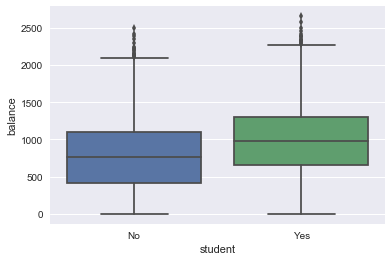

In [6]:
#boxplot del balance total de las cuentas, segmentado por el status de estudiante
box_1= sns.boxplot(x="student", y="balance", data=df)
sns.set(style="ticks", palette="pastel")

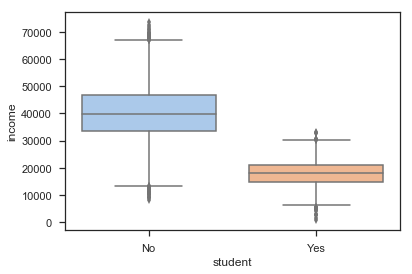

In [7]:
#boxplot del ingreso total de cada cliente, segmentado por el status de estudiante
box_2= sns.boxplot(x="student", y="income", data=df)
sns.set(style="ticks", palette="pastel")


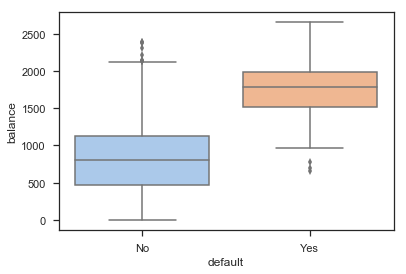

In [8]:
#boxplot del balance total de las cuentas, segmentado por el status de default.
box_3= sns.boxplot(x="default", y="balance", data=df)
sns.set(style="ticks", palette="pastel")

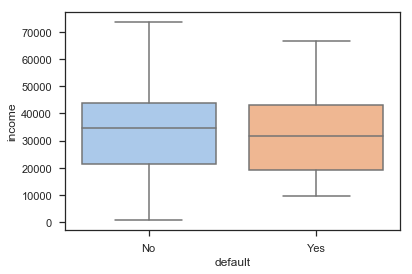

In [9]:
#boxplot del ingreso total de cada cliente, segmentado por el status de default.
box_4= sns.boxplot(x="default", y="income", data=df)
sns.set(style="ticks", palette="pastel")

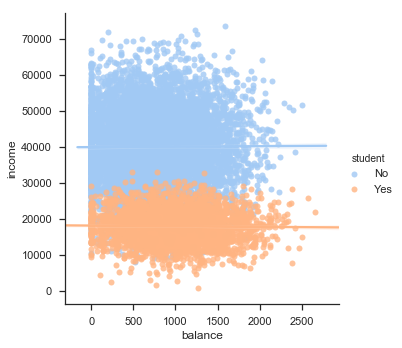

In [10]:
#diagrama de dispersión entre balance e income , segmentado por el status de estudiante.
lmplot_1 = sns.lmplot(x="balance", y="income", hue="student", data=df)

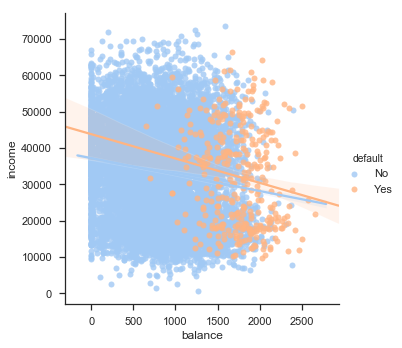

In [11]:
#diagrama de dispersión entre balance e income , segmentado por el status de default.
lmplot_3 = sns.lmplot(x="balance", y="income", hue="default", data=df);

Comente brevemente sobre los principales patrones de comportamiento:
* Se observa que el ingreso de los estudiantes es menor que de los otros clientes no estudiantes, asi como tambien menos disperso.
* Se observa que el balance de los estudiantes es superior a los de los otros clientes, aunque decreciente respecto al ingreso, a diferencia de los no esyudoantes, cuyo balance es mas constante. 
* Se observa que los clientes morosos tienen un mayor balance y que los ingresos se distribuyen de manera similar entre morosos y no morosos.
* Se oberva que el ingreso es decreciente respecto al balance, independientemente si se es moroso o no. Sin embargo, los morosos tiene una caida más abrupta (pronunciada) del ingreso respecto al balance.


### Desafío 3: Modelación econométrica
* Recodifique las variables student y default para que adquieran atributos numéricos.
* Implemente el siguiente modelo econométrico:
* A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.

In [12]:
#1. RECODIFICACION DE STUDENT Y DEFAULT
df['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [13]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [14]:
#MODELO ECONOMETRICO
df['student_bin'] = np.where(df['student'] == 'Yes',1,0)
df['default_bin'] = np.where(df['default'] == 'Yes',1,0)

In [15]:
m1_logit = smf.logit('default_bin ~ balance + income + student_bin', df).fit() 
m1_logit.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_bin   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 12 Aug 2019   Pseudo R-squ.:                  0.4619
Time:                        00:31:49   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                3.257e-292
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance         0.0057      0.000     24.737      0.000       0.005       0.006
income       3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student_bin    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
===============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [16]:
m2_logit = smf.logit('default_bin ~ balance + student_bin', df).fit() 
m2_logit.summary()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_bin   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Mon, 12 Aug 2019   Pseudo R-squ.:                  0.4619
Time:                        00:31:49   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                1.189e-293
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.7495      0.369    -29.115      0.000     -11.473     -10.026
balance         0.0057      0.000     24.748      0.000       0.005       0.006
student_bin    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
===============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Comentarios
* Se aprecia que es posible depurar el modelo  y mejorar su calidad. En este caso se mantiene el logaritmo de la verosimilitud en -785.84
    
* Se mantiene el pseudo R2, lo cual da cuenta que es positivo quitar variables ya que este indicador no emperora.

### Desafío 4: Entrenar
* A partir del modelo depurado, genere un modelo predictivo con las siguientes características:
    * Estandarize la matriz de atributos.
    * Genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.
    * Implemente el modelo sin alterar los hiperparámetros.
    * Genere la predicción de las clases y de la probabilidad.
    * Reporte las métricas de precision, recall y f1 para ambas clases.
    * Grafique la curva Receiver Operator Characteristic.
    * En base a los pasos, comente sobre el desempeño predictivo del modelo.

In [17]:
df.head()

,default,student,balance,income,student_bin,default_bin
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,1,0
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


In [18]:
#segmentacion de los datos
#seed = 666
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, 'balance':'student_bin' ], df['default_bin'], test_size=.33, random_state=666)

In [19]:
X_train.shape

(6700, 3)

In [20]:
#estandarizar matriz de atributos
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.fit_transform(X_test)

In [21]:
#modelo
default_model = LogisticRegression().fit(X_train_std, y_train)

In [22]:
#intercepto 
default_model.intercept_

array([-5.80550501])

In [23]:
#coeficientes
default_model.coef_

array([[ 2.55041374, -0.10382511, -0.37057315]])

In [24]:
#predicciones
yhat = default_model.predict(X_test_std)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
df['default_bin'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: default_bin, dtype: int32

El modelo arroja la clasificación (predicción de clase) para las  10 primeras observaciones, al compararse con las observaciones del data set original, se puede desprender que el modelo es preciso para clasificar aquellos individuos que no son morosos, puesto que tiene un 90 % de acierto en las 10 primeras observaciones.

In [26]:
#matriz de listas con probabilidades de clase 0 y 1
yhat_proba = default_model.predict_proba(X_test_std)
yhat_proba[:20]

array([[8.97738463e-01, 1.02261537e-01],
       [9.98229683e-01, 1.77031669e-03],
       [7.83487838e-01, 2.16512162e-01],
       [9.99201055e-01, 7.98945093e-04],
       [9.93308106e-01, 6.69189376e-03],
       [9.98992807e-01, 1.00719272e-03],
       [9.91497748e-01, 8.50225233e-03],
       [9.97478644e-01, 2.52135550e-03],
       [9.99957443e-01, 4.25567141e-05],
       [9.96082726e-01, 3.91727421e-03],
       [9.99487657e-01, 5.12343431e-04],
       [9.82878661e-01, 1.71213390e-02],
       [9.98345156e-01, 1.65484378e-03],
       [9.95310757e-01, 4.68924290e-03],
       [9.99758627e-01, 2.41372653e-04],
       [9.80164806e-01, 1.98351944e-02],
       [9.99616661e-01, 3.83338509e-04],
       [9.99213973e-01, 7.86026733e-04],
       [9.91765072e-01, 8.23492824e-03],
       [9.98861928e-01, 1.13807249e-03]])

In [27]:
y_test.value_counts()

0    3186
1     114
Name: default_bin, dtype: int64

In [28]:
#indicadores para evaluar validez del modelo
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3186
           1       0.78      0.28      0.41       114

   micro avg       0.97      0.97      0.97      3300
   macro avg       0.88      0.64      0.70      3300
weighted avg       0.97      0.97      0.97      3300



Las metricas del modelo reportan lo siguiente:

  - **Precision** es la manera en que el modelo predice exitosamente los casos verdaderos , en este caso vemos que para el caso de los verdaderos negativos tiene una precisión excelente del 97%, para el caso de los verdaderos positivos la precisión cae a un 78 %
  - **Recall** es una medida de sensibilidad del modelo que mide la fracción de verdaderos predichos por el modelo. Es decir, si logra predecir aquellos resultados que son relevantes. En este modelo se observa que el recall para los verdaderos negativos es 1.00 lo que significa que el modelo es capaz de predecir completamente aquellos resultados que resultan ser relevantes, sin embargo para los verdaderos positivos el recall es de sólo 28%, lo que indica que el modelo no tiene un buen desempeño para clasificar los verdaderos positivos.
  - **F1-score**: es una medida ponderada entre las metricas anteriores. Para el caso de los verdadero negativos el f1- score es excelente, lo que indica que el modelo clasifica muy bien a los individuos que no son morosos, sin embargo para el caso de los individuos morosos el f1- score decae a 0.41 lo que indica que el modelo tiene un desempeño bajo en estos casos. 


Las divergencias entre los verdaderos negativos y positivos, se pueden justificar a partir del número de casos de entrenamiento y test, para el caso de los verdaderos negativos se tuvieron 3186 registros y para los verdaderos positivos solamente 114 casos.

In [29]:
#matriz de confusion
m_confusion = confusion_matrix(y_test,yhat)
m_confusion

array([[3177,    9],
       [  82,   32]], dtype=int64)

La matriz de confusión  informa las 4 categorías posibles: verdadero negativo, falso negativo, verdadero positivo, falso positivo; si observamos la mayor cantidad de observaciones se registraron como "verdaderas negativas", ésto se debe a que el modelo inicialmente tenía una mayor cantidad de casos de personas no morosas (97 %).

In [30]:
accuracy_score(y_test,yhat)

0.9724242424242424

La precisión del modelo se obtiene al ponderar los verdaderos positivos con los verdaderos negativos, por el total de valores predichos, se observa una concordancia del 0.97 lo que indica que el modelo tiene una buena precisión.

In [31]:
#reestimacion de los valores predichos del modelo para obtener la probabilidad entre 0 y 1
#probabilidades de ocurrencia (valor 1), falsos positivos,verdaderos positivos.
yhat = default_model.predict_proba(X_test_std)[:, 1]

#generacion de os objetos de roc curve
false_positive, true_positive, threshold = roc_curve(y_test, yhat)

Curva ROC

El área bajo la curva es: 0.95


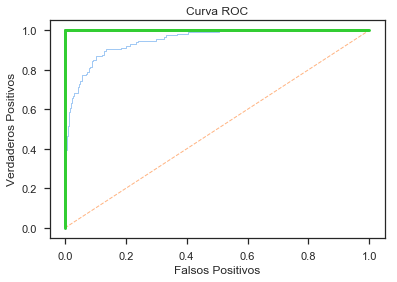

In [32]:
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)

plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

print('El área bajo la curva es:',round(roc_auc_score(y_test, yhat),2))

- La Curva ROC muestra el desempeño del modelo frente a la probabilidad de clasificación aleatoria (línea naranja; 0.5), se aprecia  que el modelo tiene un altisimo desempeño (curva azul), siendo la cercana a la curva teórica de clasificación  (curva verde), el coeficiente de desempeño es 0.95(area bajo la curva), lo que indica la alta precisión del modelo. Sin embargo, al estar desbalanceada la proporción de verdaderos negativos y verdaderos positivos, el modelo podría estar sobreestimando (overfitting) aquellos casos que no son verdaderos negativos y subestimando (underfitting) los casos que si son verdaderos positivos.